### Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./DATA/forestfires.csv')

In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


### Basic Descriptive Statistics

#### What are the summary statistics (mean, median, mode, standard deviation, etc.) for all the numeric columns (FFMC, DMC, DC, ISI, temp, RH, wind, rain, area)?

In [33]:
## LIST OF NUMERICAL COLUMNS:
num_cols = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']]

In [11]:
num_cols.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [14]:
num_cols.mode().iloc[0] ##finding the mode

FFMC     91.6
DMC      99.0
DC      745.3
ISI       9.6
temp     17.4
RH       27.0
wind      2.2
rain      0.0
area      0.0
Name: 0, dtype: float64

In [15]:
num_cols.kurt()  
##finding the kurtness- Kurtosis characterizes the relative peakedness or flatness of a distribution compared with the normal distribution.

FFMC     67.066041
DMC       0.204822
DC       -0.245244
ISI      21.458037
temp      0.136166
RH        0.438183
wind      0.054324
rain    421.295964
area    194.140721
dtype: float64

In [16]:
num_cols.var() ## variance

FFMC       30.471624
DMC      4101.951889
DC      61536.835467
ISI        20.788832
temp       33.716898
RH        266.259802
wind        3.210019
rain        0.087592
area     4052.063225
dtype: float64

In [18]:
num_cols.skew()
# skewness - Skewness is a measure of the asymmetry of a distribution.

FFMC    -6.575606
DMC      0.547498
DC      -1.100445
ISI      2.536325
temp    -0.331172
RH       0.862904
wind     0.571001
rain    19.816344
area    12.846934
dtype: float64

#### What is the distribution of the burned area (area)? Is it skewed?

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


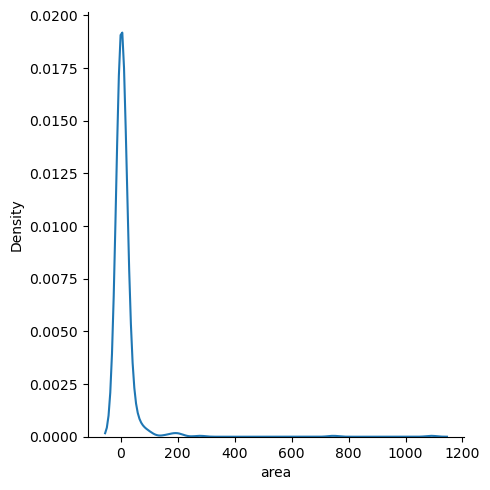

In [24]:
sns.displot(data=df, x='area', kind="kde")

This distribution is skewed towards the right, showing a higher mean as compared to a median. The peak of the distribution is around 0, which suggests that majority of the points are concentrated around it, with the relatively low outliers being larger values. 

### Temporal Analysis

#### How does the burned area vary across different months? Is there a particular month where more fires occur?

<Axes: xlabel='month', ylabel='area'>

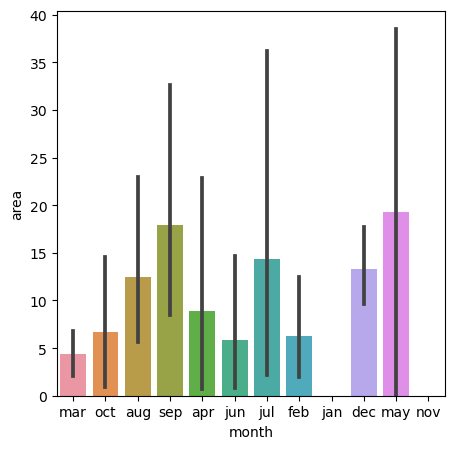

In [29]:
plt.figure(figsize=(5,5))
sns.barplot(data=df, x='month', y='area')

In mainland Portugal, these natural wildfires are more prone to occur during the summer, when temperatures are high and relative air humidity is low. The error bars vary in length, indicating different levels of variability in the data for each month. Some months have more consistent "area" values than others. The variation in "area" across months might suggest seasonal patterns or trends. 

#### What is the trend of burned area across different days of the week? Is there any day with more frequent fires?

<Axes: xlabel='day', ylabel='area'>

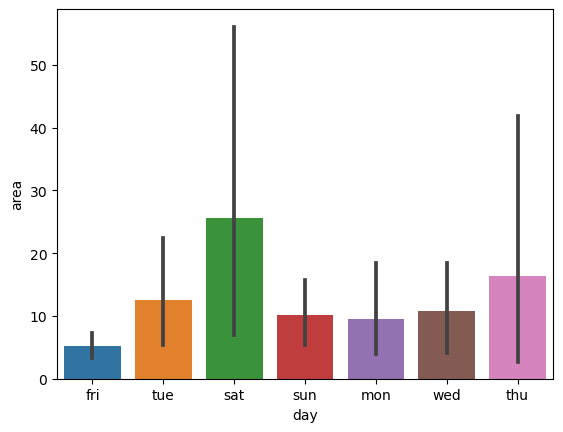

In [31]:
sns.barplot(data=df, x='day', y='area')

The error bars show the variability around the mean values. The plot reveals that there is significant variation in "area" across weekdays. Saturday has the highest average "area," followed by Thursday and Tuesday. Friday and Sunday have the lowest average areas. The error bars indicate that there is more variability in "area" on some days than others, suggesting that the data points for those days are more spread out. Overall, the plot suggests that there is a clear day-to-day pattern in the distribution of "area."

#### Does fire frequency or burned area differ between seasons?

In [12]:
### Creating a conditional column of season
conditions = [
    (df['month'] == 'mar') | (df['month'] == 'apr') | (df['month'] == 'may'),
    (df['month'] == 'jun') | (df['month'] == 'jul') | (df['month'] == 'aug'),
    (df['month'] == 'sep') | (df['month'] == 'oct') | (df['month'] == 'nov'), 
    (df['month'] == 'dec') | (df['month'] == 'jan') | (df['month'] == 'feb')]
choices = ['spring', 'summer', 'autumn', 'winter']
df['season'] = np.select(conditions,choices)

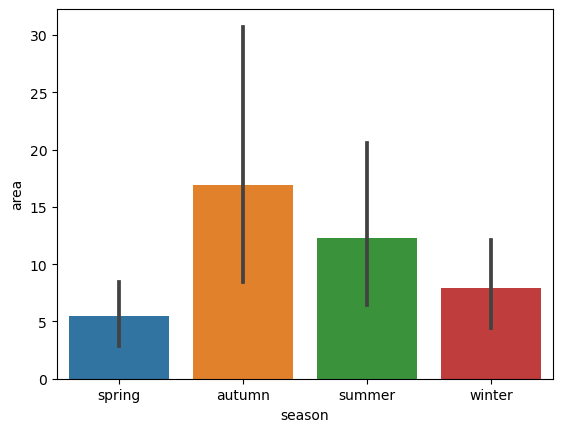

In [13]:
sns.barplot(data=df, x='season', y='area');

In [14]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,season
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,spring
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,autumn
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,autumn
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,spring
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,spring


In [15]:
df['season'].value_counts()

season
summer    233
autumn    188
spring     65
winter     31
Name: count, dtype: int64

In [16]:
df[['season', 'month']]

,season,month
0,spring,mar
1,autumn,oct
2,autumn,oct
3,spring,mar
4,spring,mar
...,...,...
512,summer,aug
513,summer,aug
514,summer,aug
515,summer,aug


<Axes: xlabel='season', ylabel='area'>

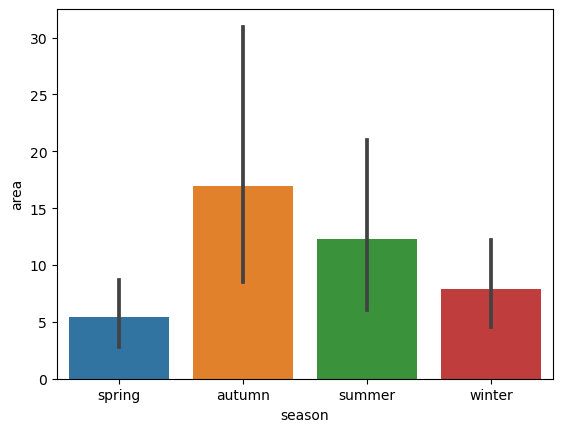

In [17]:
sns.barplot(data=df, x='season', y='area')

### Spatial Analysis

#### How does the burned area vary with the x- and y-axis spatial coordinates (X and Y)?

<Axes: xlabel='X', ylabel='area'>

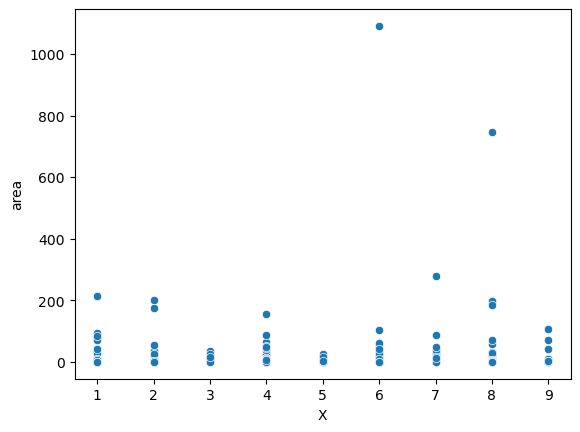

In [19]:
## variation with x-coordinate
sns.scatterplot(data=df, x='X', y='area')

<Axes: xlabel='Y', ylabel='area'>

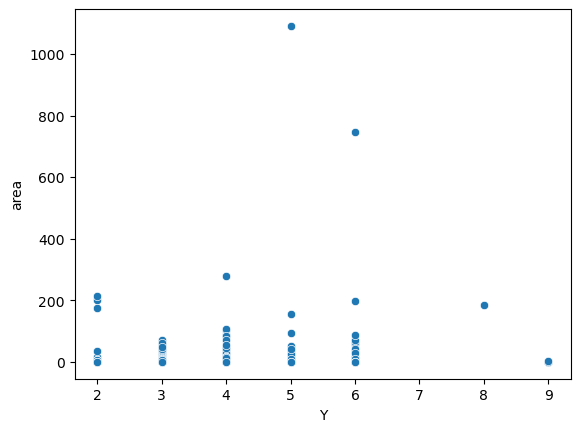

In [20]:
sns.scatterplot(x='Y', y='area', data=df)

#### Are there specific regions in the park (based on X and Y coordinates) where the fire occurrences are more frequent?


In [22]:
# filtering rows where fire has occurred
fires_df = df[df['area'] > 0]

# grouping by X and y coordinates
fire_occurrences = fires_df.groupby(['X', 'Y']).size().reset_index(name='fire_count')

# pivoting the data to create matrix
fire_pivot = fire_occurrences.pivot(index='Y', columns='X', values='fire_count')


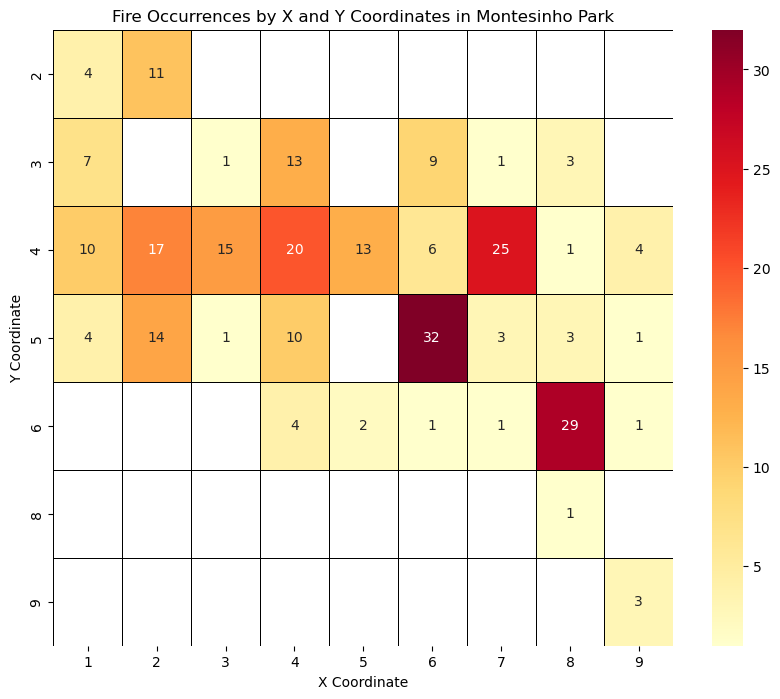

In [23]:
## heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(fire_pivot, annot=True, cmap='YlOrRd', linewidths=0.5, linecolor='black')
plt.title("Fire Occurrences by X and Y Coordinates in Montesinho Park")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

### Environmental Factors Impact

#### How does the FFMC index correlate with the burned area? Does a higher FFMC index lead to a larger burned area

<Axes: xlabel='FFMC', ylabel='area'>

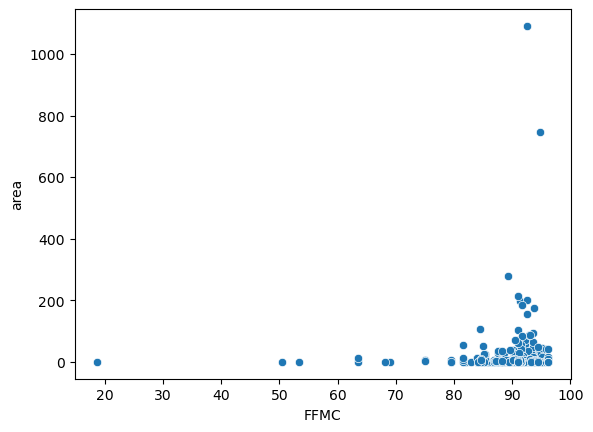

In [24]:
sns.scatterplot(x='FFMC', y='area', data=df)

#### What is the relationship between DMC, DC, and ISI indices with the area burned? Which fire weather index has the strongest impact on the burned area?

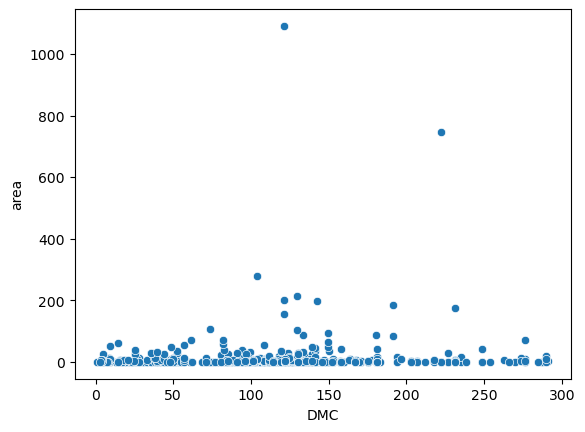

In [25]:
sns.scatterplot(data=df, x='DMC', y='area');

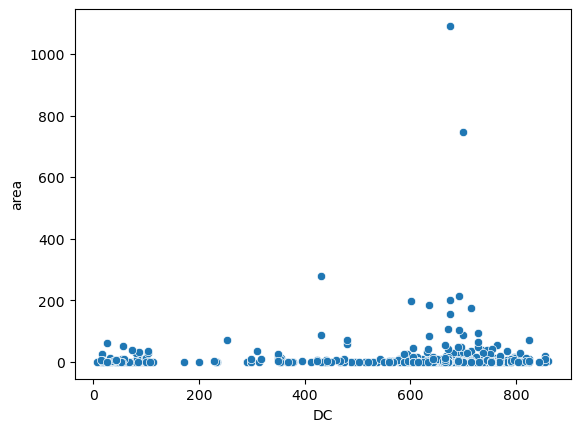

In [26]:
sns.scatterplot(data=df, x='DC', y='area');

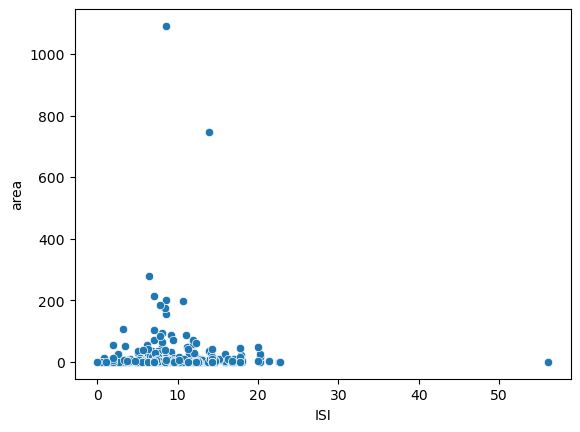

In [27]:
sns.scatterplot(data=df, x='ISI', y='area');

#### How does temperature impact the burned area? Is there a pattern between higher temperatures and larger areas burned?

<Axes: xlabel='temp', ylabel='area'>

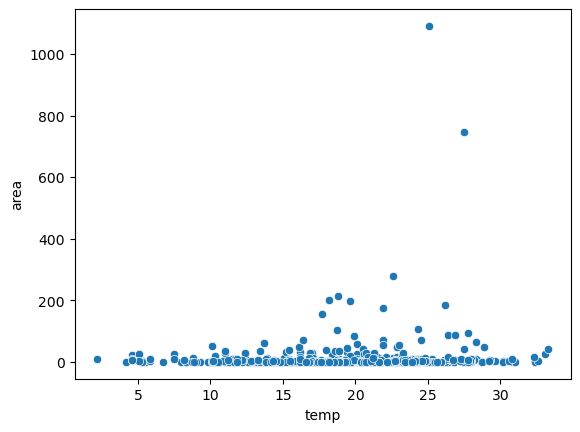

In [28]:
sns.scatterplot(data=df, y='area', x='temp')

#### How does relative humidity (RH) affect the burned area? Do lower humidity levels lead to larger fires?


Text(0, 0.5, 'Burned Area (ha)')

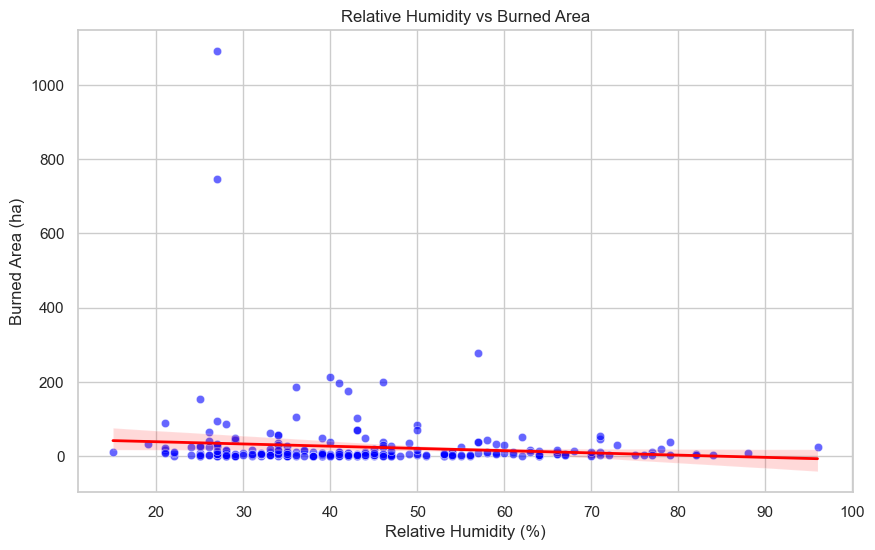

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fires_df['RH'], y=fires_df['area'], color='blue', alpha=0.6)
sns.regplot(x=fires_df['RH'], y=fires_df['area'], scatter=False, color='red', line_kws={"linewidth":2})
plt.title('Relative Humidity vs Burned Area')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Burned Area (ha)')

#### What is the relationship between wind speed and the burned area? Do higher wind speeds result in more intense fires?

Text(0, 0.5, 'Burned Area (ha)')

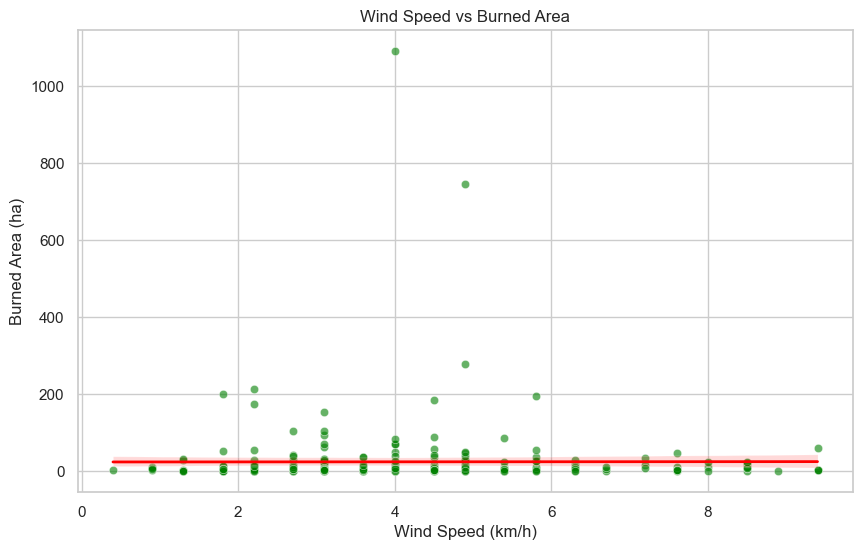

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fires_df['wind'], y=fires_df['area'], color='green', alpha=0.6)
sns.regplot(x=fires_df['wind'], y=fires_df['area'], scatter=False, color='red', line_kws={"linewidth":2})
plt.title('Wind Speed vs Burned Area')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Burned Area (ha)')

#### How does rain affect the burned area? Do rainy conditions lead to smaller fires?

Text(0, 0.5, 'Burned Area (ha)')

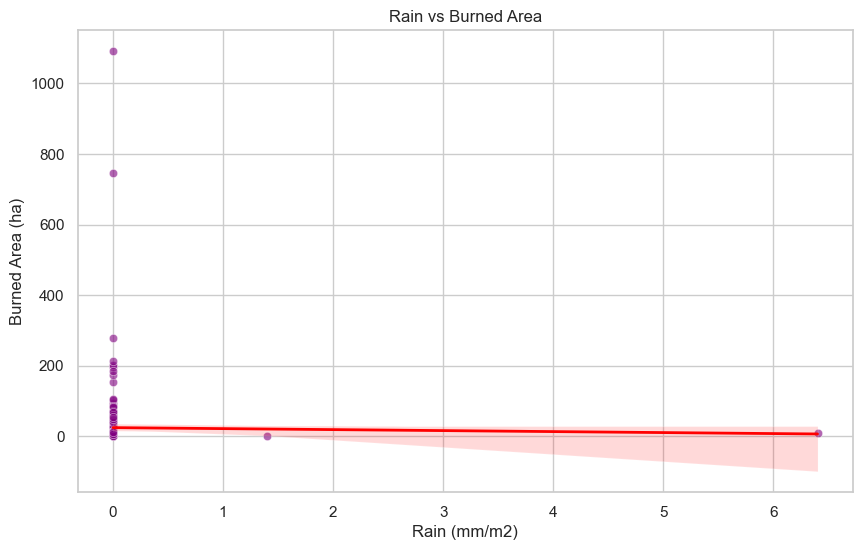

In [36]:


plt.figure(figsize=(10, 6))
sns.scatterplot(x=fires_df['rain'], y=fires_df['area'], color='purple', alpha=0.6)
sns.regplot(x=fires_df['rain'], y=fires_df['area'], scatter=False, color='red', line_kws={"linewidth":2})
plt.title('Rain vs Burned Area')
plt.xlabel('Rain (mm/m2)')
plt.ylabel('Burned Area (ha)')

### Correlations

#### What are the correlations between all the numeric features (FFMC, DMC, DC, ISI, temp, RH, wind, rain) and the burned area?


Text(0.5, 1.0, 'Correlation Matrix of Numeric Features and Burned Area')

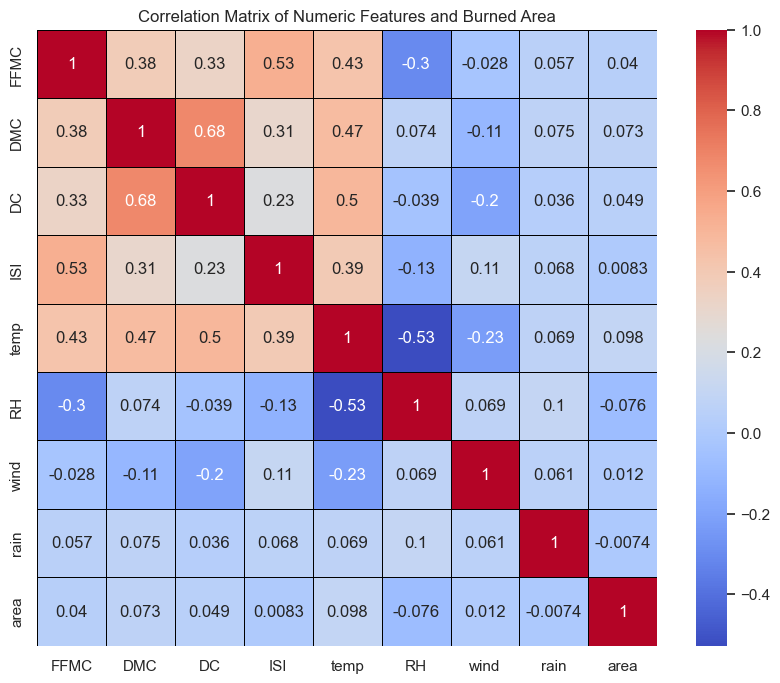

In [37]:
numeric_columns = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Numeric Features and Burned Area')

#### Which features are most strongly correlated with each other? For instance, how do FFMC, DMC, DC, and ISI interact?

In [38]:
subset = ['FFMC', 'DMC', 'DC', 'ISI']
correlation_subset = correlation_matrix.loc[subset, subset]


Text(0.5, 1.0, 'Correlation Matrix: FFMC, DMC, DC, and ISI')

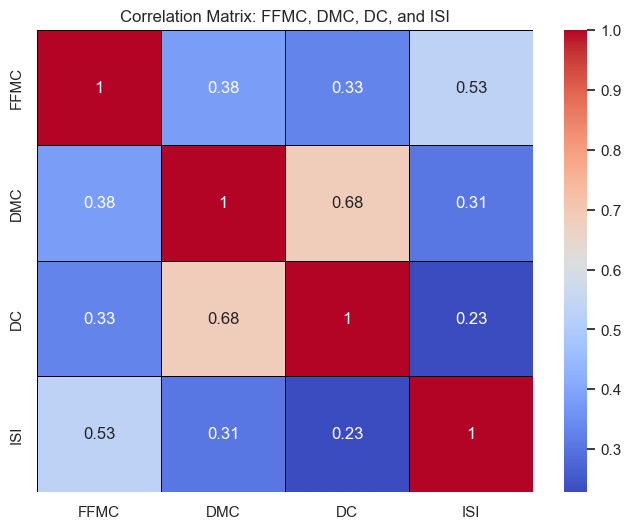

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix: FFMC, DMC, DC, and ISI')

### Outliers and Anomalies

#### Are there any outliers in the burned area? Are certain extreme values linked to particular weather conditions or specific locations (X, Y)?

Text(0.5, 1.0, 'Box Plot of Burned Area')

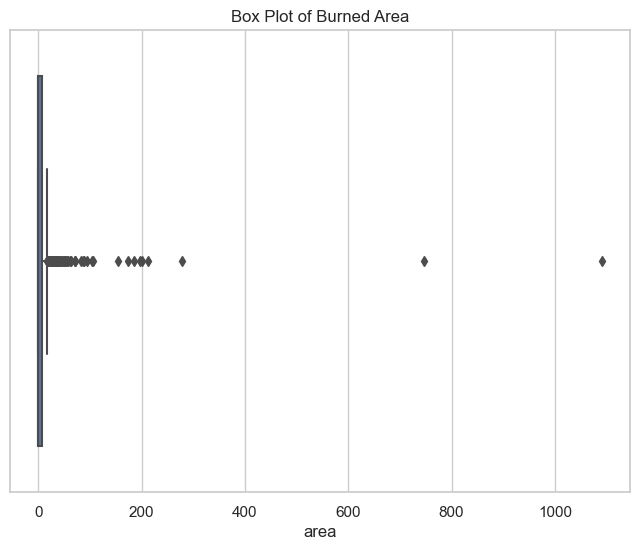

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='area')
plt.title('Box Plot of Burned Area')

In [41]:
## OUTLIER FILTER

Q1 = df['area'].quantile(0.25)  
Q3 = df['area'].quantile(0.75)  
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['area'] < lower_bound) | (df['area'] > upper_bound)]

Text(0.5, 1.0, 'Relationship between Temperature, Humidity, Wind, and Burned Area (Outliers)')

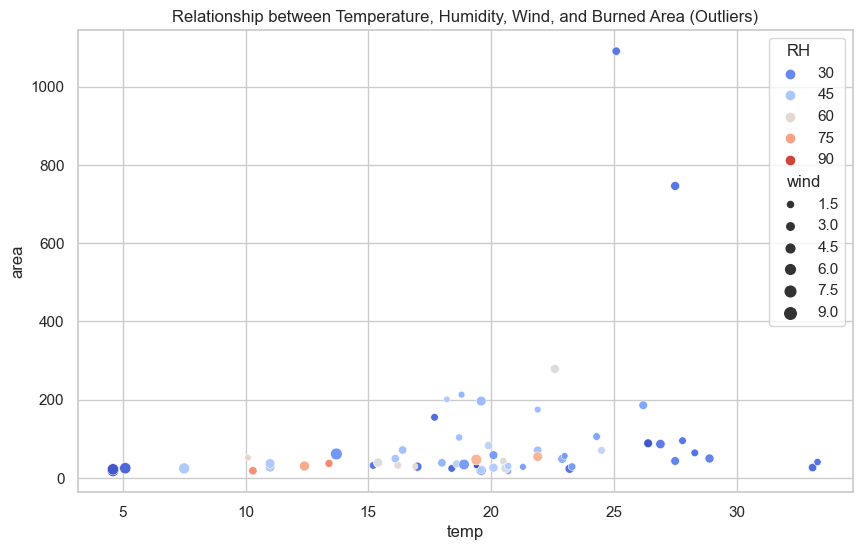

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=outliers, x='temp', y='area', hue='RH', size='wind', palette='coolwarm')
plt.title('Relationship between Temperature, Humidity, Wind, and Burned Area (Outliers)')

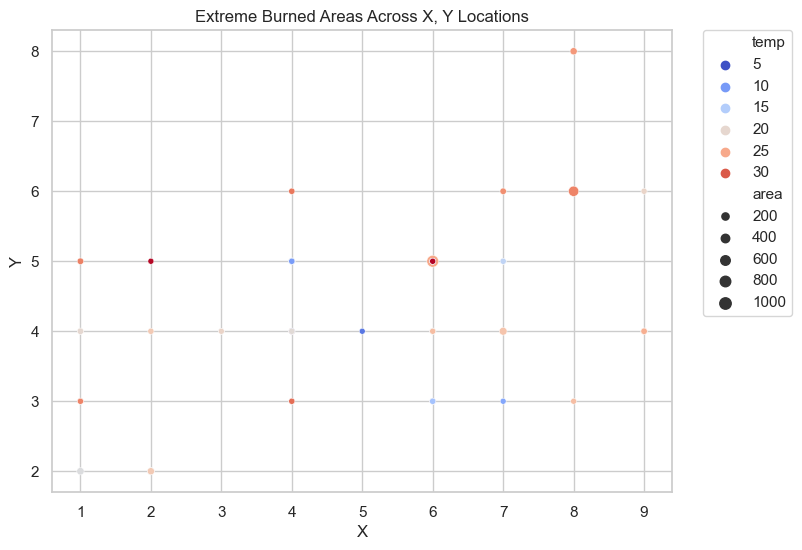

In [47]:
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(data=outliers, x='X', y='Y', size='area', hue='temp', palette='coolwarm')
plt.title('Extreme Burned Areas Across X, Y Locations')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#### Are there any unusual patterns in the data for features like rain, wind, or ISI that might indicate rare or significant fire events?

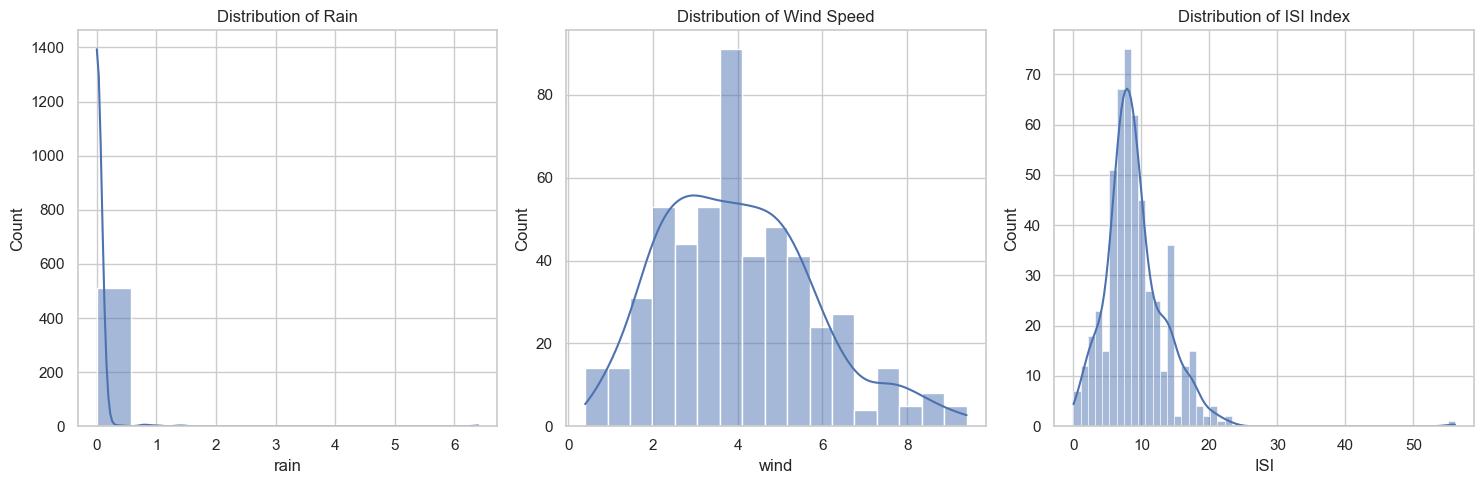

In [48]:
plt.figure(figsize=(15, 5))

# Rain distribution
plt.subplot(1, 3, 1)
sns.histplot(df['rain'], kde=True)
plt.title('Distribution of Rain')

# Wind distribution
plt.subplot(1, 3, 2)
sns.histplot(df['wind'], kde=True)
plt.title('Distribution of Wind Speed')

# ISI distribution
plt.subplot(1, 3, 3)
sns.histplot(df['ISI'], kde=True)
plt.title('Distribution of ISI Index')

plt.tight_layout()

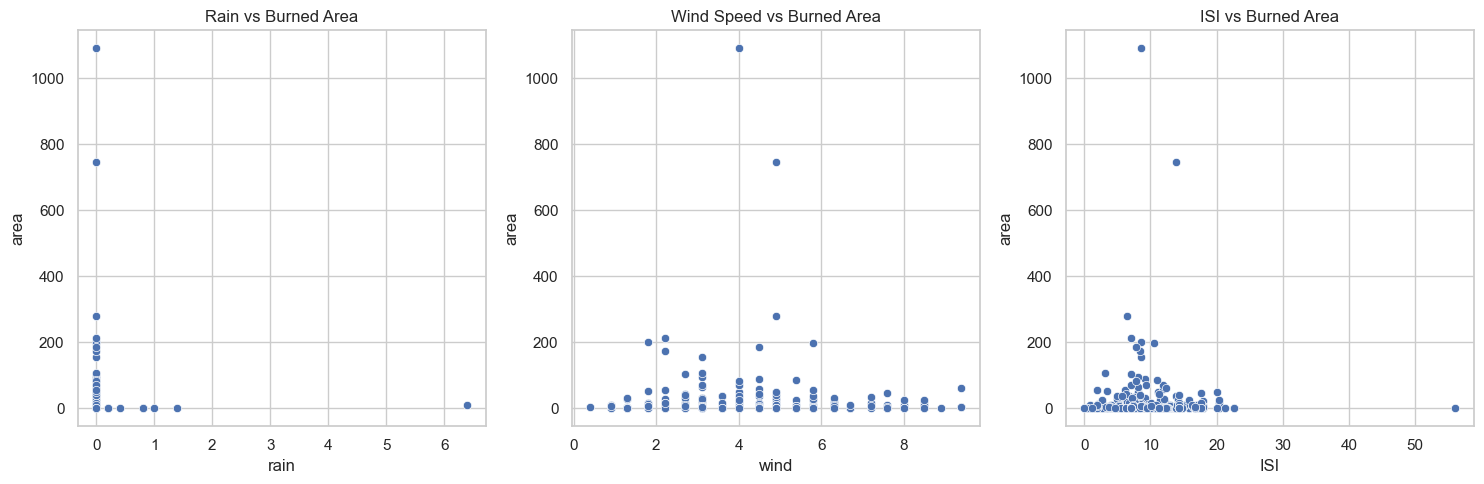

In [49]:
plt.figure(figsize=(15, 5))

# Rain vs Burned Area
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='rain', y='area')
plt.title('Rain vs Burned Area')

# Wind vs Burned Area
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='wind', y='area')
plt.title('Wind Speed vs Burned Area')

# ISI vs Burned Area
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='ISI', y='area')
plt.title('ISI vs Burned Area')

plt.tight_layout()

Text(0.5, 1.0, 'Correlation Matrix')

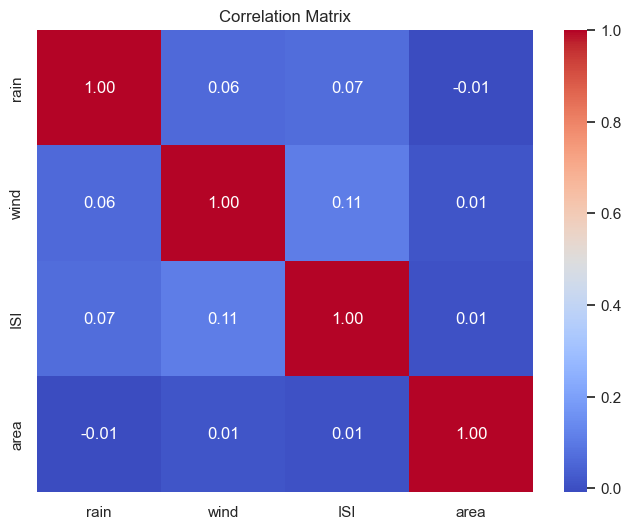

In [50]:
correlation_matrix = df[['rain', 'wind', 'ISI', 'area']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

In [51]:
rare_events = df[(df['rain'] == 0) & (df['wind'] > 5) & (df['ISI'] > 15)]

print("Rare Fire Events:")
print(rare_events[['rain', 'wind', 'ISI', 'area']])

Rare Fire Events:
     rain  wind   ISI   area
24    0.0   5.8  20.3   0.00
42    0.0   5.4  17.0   0.00
124   0.0   5.4  15.9   0.00
135   0.0   5.8  20.3   0.00
148   0.0   6.7  17.0   1.07
195   0.0   5.4  15.1  10.02
206   0.0   7.2  20.3  15.45
211   0.0   5.8  20.3  26.00
443   0.0   8.0  16.8   0.00
450   0.0   5.4  18.0   6.43
475   0.0   9.4  18.0   3.19
486   0.0   6.3  17.7   2.00
488   0.0   7.6  17.7  46.70


### Multivariate Analysis

#### What is the joint impact of temperature and relative humidity on the burned area? Are fires more common when the temperature is high and humidity is low? 

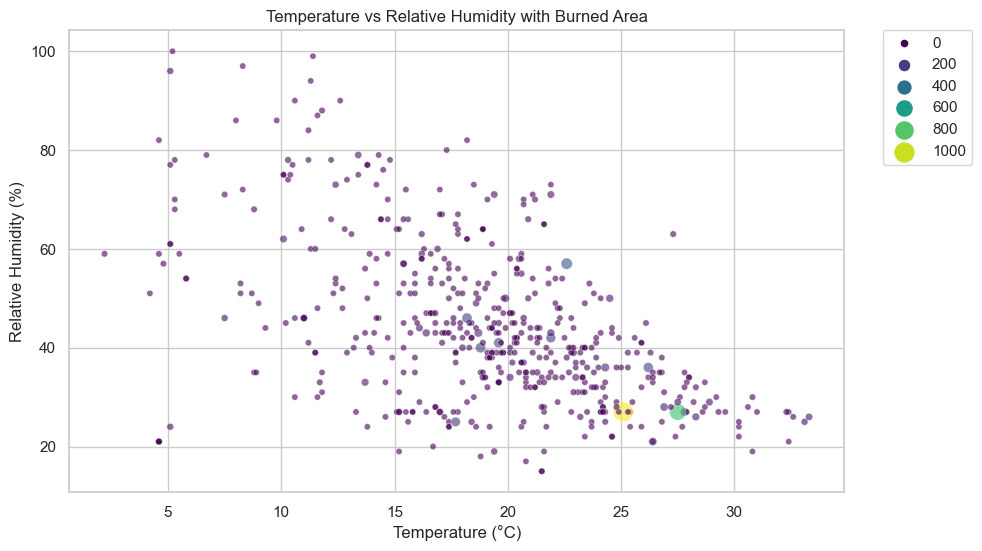

In [52]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='temp', y='RH', size='area', sizes=(20, 200), hue='area', palette='viridis', alpha=0.6)
plt.title('Temperature vs Relative Humidity with Burned Area')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [53]:
correlation_temp_area = df[['temp', 'RH', 'area']].corr()
print("Correlation Matrix:\n", correlation_temp_area)

Correlation Matrix:
           temp        RH      area
temp  1.000000 -0.527390  0.097844
RH   -0.527390  1.000000 -0.075519
area  0.097844 -0.075519  1.000000


#### How does the interaction between month and environmental conditions (e.g., FFMC, DMC, temp) influence the burned area?


C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2400x1600 with 0 Axes>

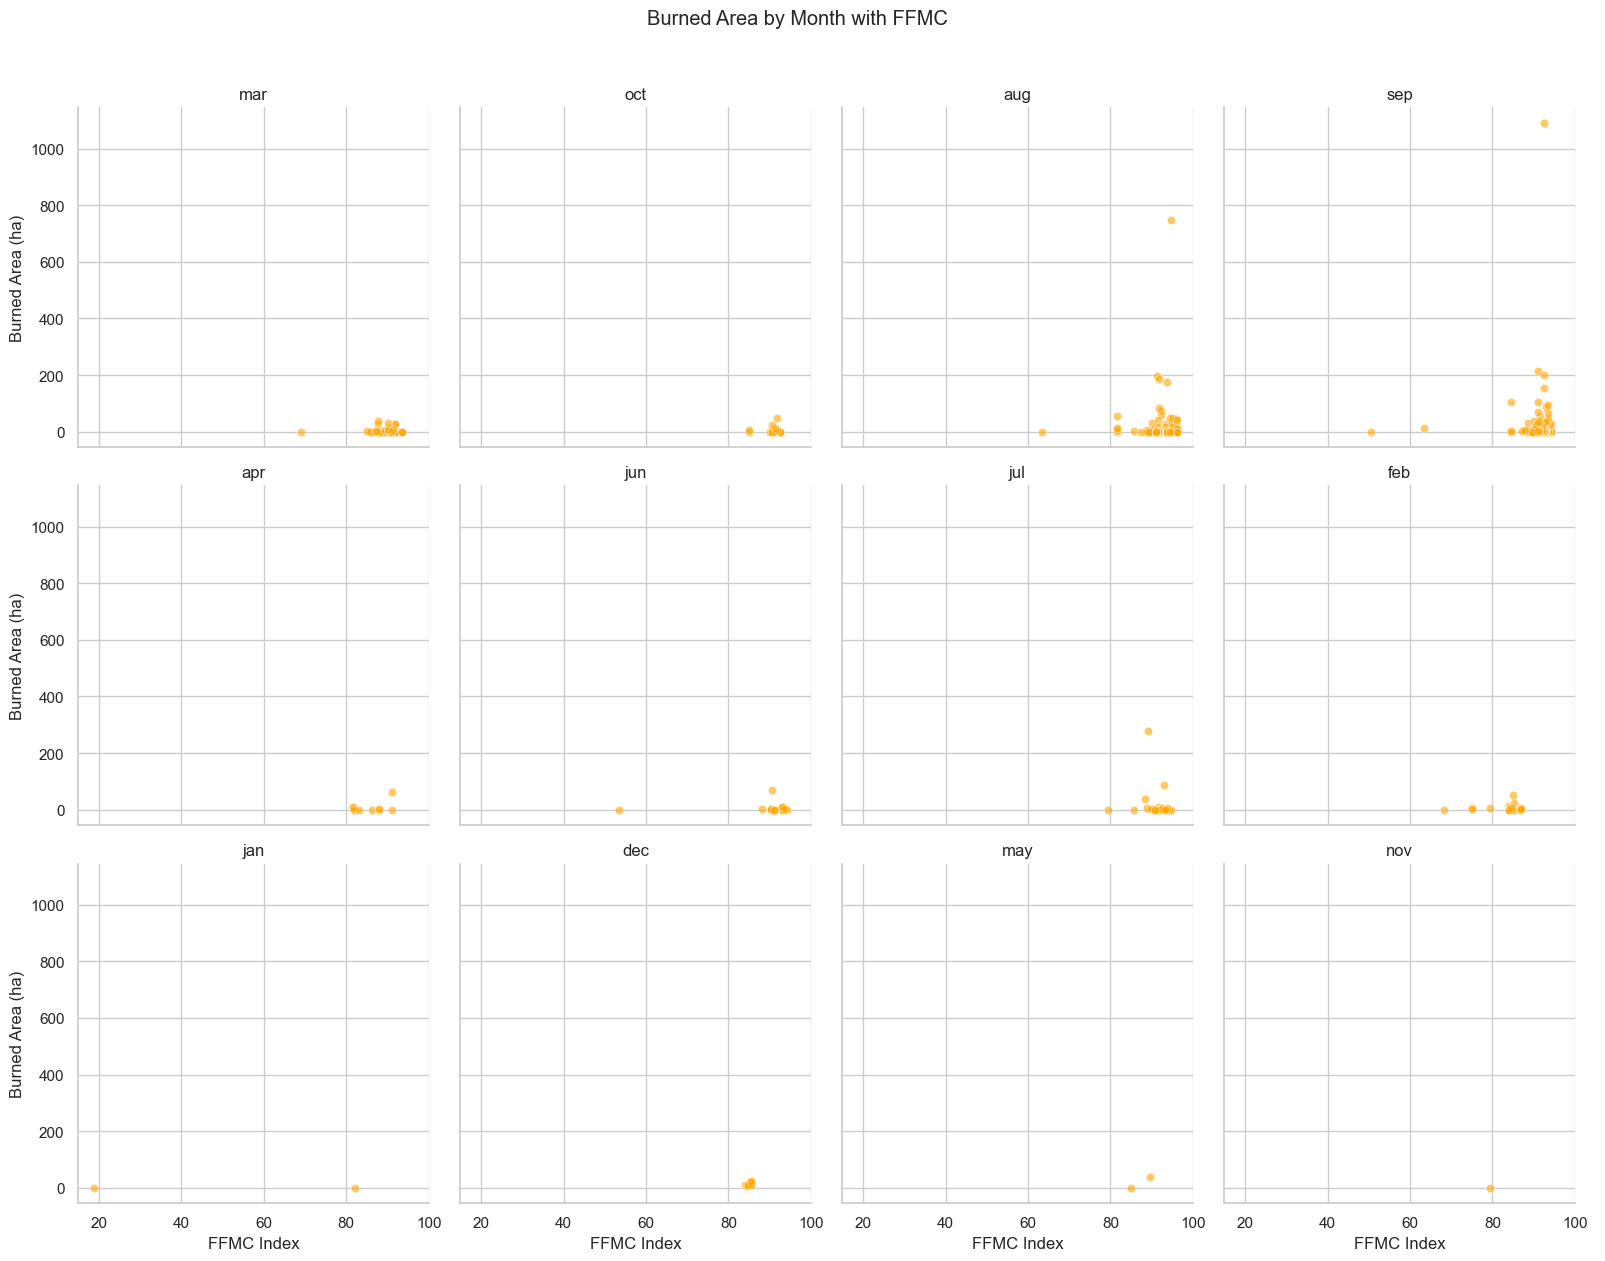

In [61]:
plt.figure(figsize=(24,16))
g = sns.FacetGrid(df, col='month', col_wrap=4, height=4)
g.map(sns.scatterplot, 'FFMC', 'area', color='orange', alpha=0.6)
g.set_axis_labels('FFMC Index', 'Burned Area (ha)')
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.suptitle('Burned Area by Month with FFMC', y=1.05)
plt.show()

In [55]:
correlation_wind_ISI_area = df[['wind', 'ISI', 'area']].corr()
print("Correlation Matrix:\n", correlation_wind_ISI_area)

Correlation Matrix:
           wind       ISI      area
wind  1.000000  0.106826  0.012317
ISI   0.106826  1.000000  0.008258
area  0.012317  0.008258  1.000000


### Categorical Analysis

#### How does the burned area differ across the different days of the week (Monday to Sunday)? Are weekends more prone to fires?

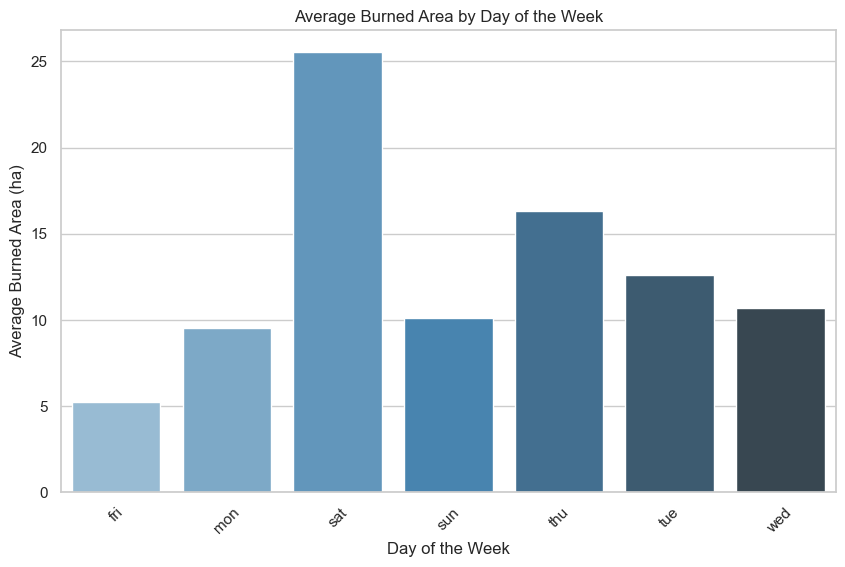

In [64]:
daily_burned_area = df.groupby('day')['area'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=daily_burned_area, x='day', y='area', palette='Blues_d');
plt.title('Average Burned Area by Day of the Week');
plt.xlabel('Day of the Week');
plt.ylabel('Average Burned Area (ha)');
plt.xticks(rotation=45);

#### How does the burned area vary across different months (January to December)? Is there a particular season or month with more fire incidents?

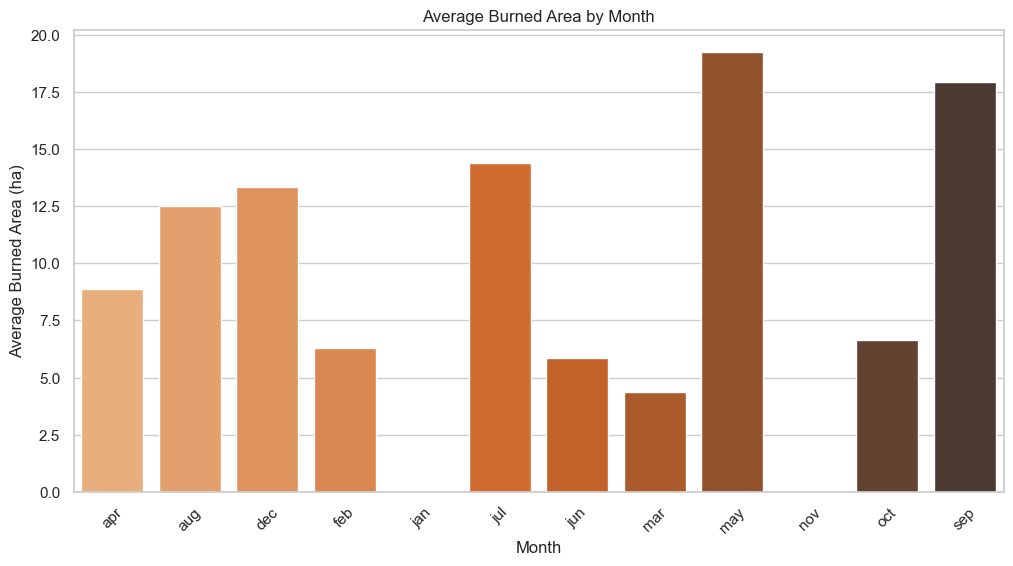

In [65]:
monthly_burned_area = df.groupby('month')['area'].mean().reset_index()

# Step 4: Create a bar plot for Burned Area by Month
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_burned_area, x='month', y='area', palette='Oranges_d');
plt.title('Average Burned Area by Month');
plt.xlabel('Month');
plt.ylabel('Average Burned Area (ha)');
plt.xticks(rotation=45);

### Feature Engineering

In [4]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
month_mapping = {
    'jan': 1, 'feb':2, 'mar':3, 'apr':4,
    'may': 5, 'jun': 6, 'jul':7, 'aug':8,
    'sep': 9, 'oct': 10, 'nov':11, 'dec':12
}

df['month_encoded'] = df['month'].map(month_mapping)

In [6]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_encoded
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3


In [7]:
day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu':4, 'fri':5, 'sat':6, 'sun':7
}

df['day_encoded'] = df['day'].map(day_mapping)

In [8]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_encoded,day_encoded
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3,5
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,2
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,6
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3,5
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3,7


In [10]:
data = df.copy()

In [11]:
data = data.drop('month', axis=1)

In [12]:
data = data.drop('day', axis=1)

In [13]:
data.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_encoded,day_encoded
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3,5
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,2
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,6
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3,5
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3,7


In [14]:
data = data.rename(columns = {
    'month_encoded': 'month', 
    'day_encoded': 'day'
})

In [15]:
data.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month,day
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3,5
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,10,2
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,10,6
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3,5
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3,7


In [16]:
data.to_csv('forestcleaned.csv')